In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from numpy.random import default_rng
from scipy.stats import ttest_ind

In [2]:
rng = default_rng()

# HW_03
## Throwing distance variations

How far can you throw a baseball? What are some factors that would change how far the ball travels:

- drag?
- 3D motion?
- rotation of the ball? e.g. [Magnus effect](https://en.wikipedia.org/wiki/Magnus_effect)
- are there social or human factors that change distance thrown?

Try repeating the throwing comparison between Pat and Jim, but add another variable to the analysis. 

work is energy, so we can say W = kinetic energy

$W = \frac{1}{2}mv^2\rightarrow v = \sqrt{\frac{2 W}{m}}$

where a baseball is 

and farthest distance thrown is $\theta=45^o\pm5^o$

so our distance, x, and height, y, are now:

$x(t) = v\cos(\theta)t$

$y(t) = 1.5 + v\sin(\theta)t -\frac{g}{2}t^2$

In [3]:
N_throws = 10
Pat_W = rng.normal(loc = 68, scale = 3, size = (N_throws,))
Jim_W = rng.normal(loc = 65, scale = 2, size = (N_throws,))

Pat_angle = rng.normal(loc = np.pi/4, scale = 5/180*np.pi, size = (N_throws,))
Jim_angle = rng.normal(loc = np.pi/4, scale = 5/180*np.pi, size = (N_throws,))

Pat_v = np.sqrt(2*Pat_W/0.15)
Jim_v = np.sqrt(2*Jim_W/0.15)

t_N = 50 # number of timesteps for path results
Pat_x = np.zeros((t_N, N_throws))
Pat_y = np.zeros((t_N, N_throws))
Jim_x = np.zeros((t_N, N_throws))
Jim_y = np.zeros((t_N, N_throws))

In [4]:
for i in range(N_throws):
    Pat_tmax = np.roots([-9.81/2, Pat_v[i]*np.sin(Pat_angle[i]), 1.5]).max()
    Jim_tmax = np.roots([-9.81/2, Jim_v[i]*np.sin(Jim_angle[i]), 1.5]).max()
    t = np.linspace(0, Pat_tmax, t_N)
    Pat_x[:,i] = Pat_v[i]*np.cos(Pat_angle[i])*t
    Pat_y[:,i] = 1.5 + Pat_v[i]*np.sin(Pat_angle[i])*t - 9.81*t**2/2

    t = np.linspace(0, Jim_tmax, t_N)
    Jim_x[:,i] = Jim_v[i]*np.cos(Jim_angle[i])*t
    Jim_y[:,i] = 1.5 + Jim_v[i]*np.sin(Jim_angle[i])*t - 9.81*t**2/2

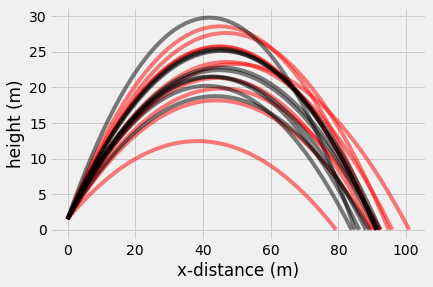

In [5]:
plt.plot(Pat_x, Pat_y, 'r-', alpha = 0.5)
plt.plot(Jim_x, Jim_y, 'k-', alpha = 0.5)
plt.xlabel('x-distance (m)')
plt.ylabel('height (m)');

In [6]:
ttest_ind(Pat_x[-1, :], Jim_x[-1, :])

Ttest_indResult(statistic=1.3253974876936236, pvalue=0.20161709726719787)

Text(0.5, 1.0, 'Pat throws 2.7 m farther than Jim\nafter 10 throws')

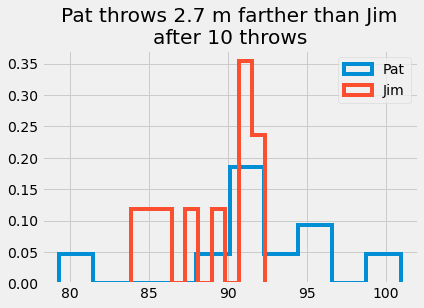

In [7]:
plt.hist(Pat_x[-1, :],
        histtype='step',
        linewidth = 4,
         label = 'Pat',
         density = True,)
        #bins = np.linspace(50,80, 31))
plt.hist(Jim_x[-1, :], 
        histtype = 'step',
        linewidth = 4,
         label = 'Jim',
         density = True,)
plt.legend();
plt.title('Pat throws {:1.1f} m farther than Jim\nafter {} throws'.format(np.mean(Pat_x[-1, :]- Jim_x[-1, :]), N_throws))

## Monte Carlo Report on throwing distances

Create a technical report to detail the factors that affect throwing distance. 

- What did you include in your analysis?
- Did you find any better estimates for the initial speed and angle? What was the reference?
- Which factors had a bigger impact on distance?
- What is something that should be included, but might require more research or information?

**Introduction**

Throwing distance of a baseball is based on factors. Drag, 3D motion, muscle strength, and technique impact initial speed of the baseball which impacts throwing distance. The ideal throwing angle is 45 degrees (Adair, R. K. (2002). The Physics of Baseball (3rd ed.). Harper Perennial.). However, the thrower's height and release point affect the throwing angle. In this report, I want to perform a throwing comparison between Pat and Jim using the Magnus effect. The Magnus effect affects throw trajectory due to spin imparted on the baseball. Backspin can increase lift, potentially extending the throw distance while topspin Reduces distance due to downward force. Thowing distance can be calculated considering the Magnus effect.

**Methods**

Consider a case where two people, Pat and Jim, are going to throw the same ball as far as possible. Pat is stronger than Jim. Pat creates an average of 68 J of work throwing a ball, and Jim creates an average of 65 J. Pat is on average \frac{68-65}{65} = 4.62% stronger than Jim. Let’s assume both Pat and Jim can sometimes throw a little faster and sometimes a little slower so the actual values are 68 +/- 3 J and 65 +/- 2 J. A throwing comparison between Pat and Jim can be made by considering work is energy, so we can say W = kinetic energy. Therefore, $W = \frac{1}{2}mv^2\rightarrow v = \sqrt{\frac{2 W}{m}}$. The throwing angle is 45 degrees with an uncertainty of 5 degrees. The height and distance can be considered as x and y. $x(t) = v\cos(\theta)t$ and $y(t) = 1.5 + v\sin(\theta)t -\frac{g}{2}t^2$.

**Analysis**

I completed the throwing comparison between Pat and Jim after 10 throws each. On average, Pat threw 2.7 m farther than Jim. The histogram above shows the average work of the throw to the relative number of throws. Pat has a larger work of throw value. This predicts that Pat will have a larger throwing distance.

**Conclusion**

This experiment demonstrates the Magnus effect in a practical application to compare throwing distances. In this project, I calculate Pat and Jim's throwing distances utilizing the Magnus effect to consider rotation of the ball. Larger work of throw values leads to a higher throwing distance. Drag opposes the motion of the baseball through the air, reducing its speed and range. More research and information is required to consider the effect of drag on throwing distance.